In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
file_path = 'Tetuan-City-power-consumption.csv'
input = pd.read_csv(file_path)

In [ ]:
df = input

In [ ]:
# Display basic information about the dataset
print("Dataset Overview:")
print(df.isnull().sum())

Dataset Overview:
DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64


In [ ]:
# Aggregate power consumption across all three zones
df['Total Power Consumption'] = df['Zone 1 Power Consumption'] + \
                                df['Zone 2  Power Consumption'] + \
                                df['Zone 3  Power Consumption']

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Weekday'] = df['DateTime'].dt.weekday

In [ ]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Total Power Consumption,Hour,Day,Month,Weekday
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544,0,1,1,6
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.84387,0,1,1,6
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.22193,0,1,1,6
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.23209,0,1,1,6
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.44627,0,1,1,6


In [ ]:
data = df.drop(['Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption'],axis=1)

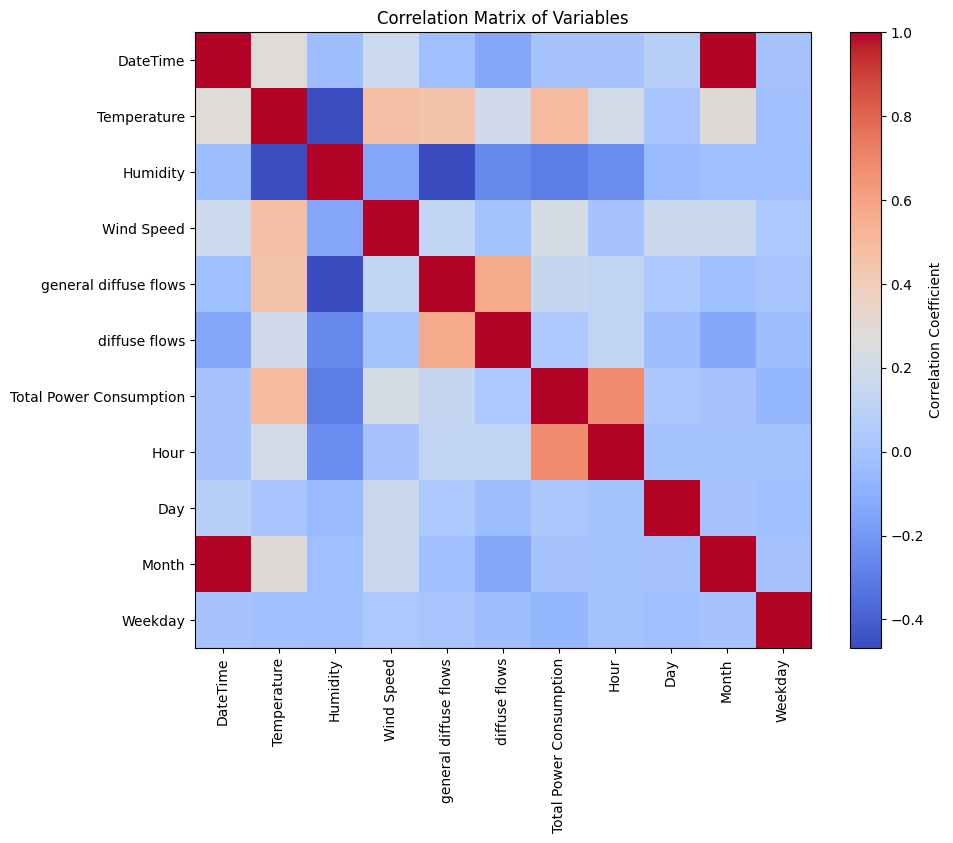

In [ ]:
# Correlation Matrix
correlation = data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Correlation Matrix of Variables')
plt.show()

In [ ]:
# Helper function for line plots
def plot_aggregate_correlation(x, y, xlabel, ylabel, title, plot_type='line'):
    plt.figure(figsize=(10, 6))
    if plot_type == 'line':
        plt.plot(x, y, linestyle='-', marker='o', alpha=0.8)
    elif plot_type == 'bar':
        plt.bar(x, y, alpha=0.8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

<ipython-input-11-aebd608a96d8>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temperature_means = data.groupby(temperature_bins)['Total Power Consumption'].mean()


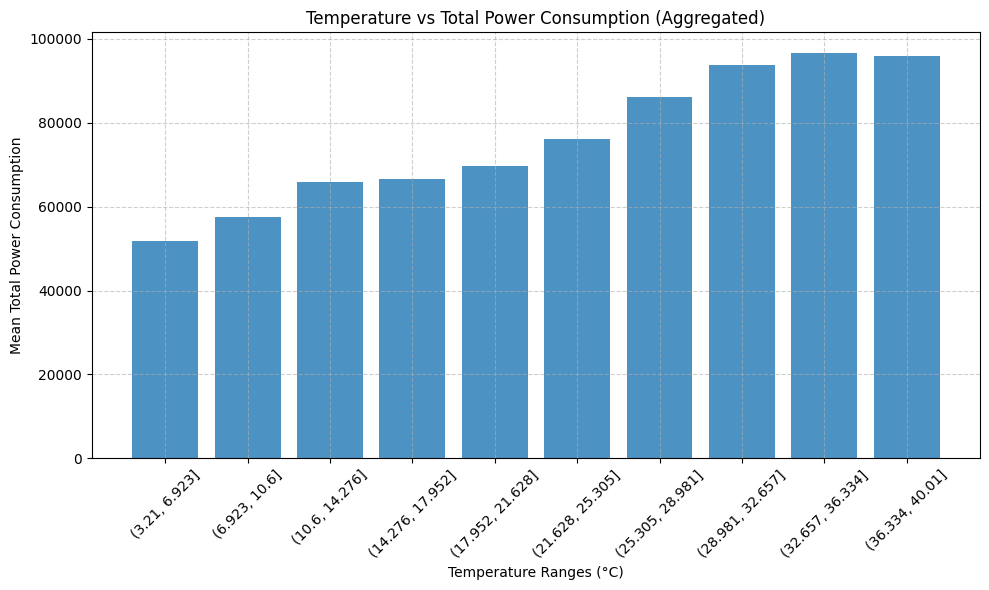

In [ ]:
# Group by temperature ranges and aggregate power consumption
temperature_bins = pd.cut(data['Temperature'], bins=10)
temperature_means = data.groupby(temperature_bins)['Total Power Consumption'].mean()
plot_aggregate_correlation(temperature_means.index.astype(str), temperature_means.values,
                           "Temperature Ranges (°C)", "Mean Total Power Consumption",
                           "Temperature vs Total Power Consumption (Aggregated)", plot_type='bar')

<ipython-input-12-f783c0099102>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humidity_means = data.groupby(humidity_bins)['Total Power Consumption'].mean()


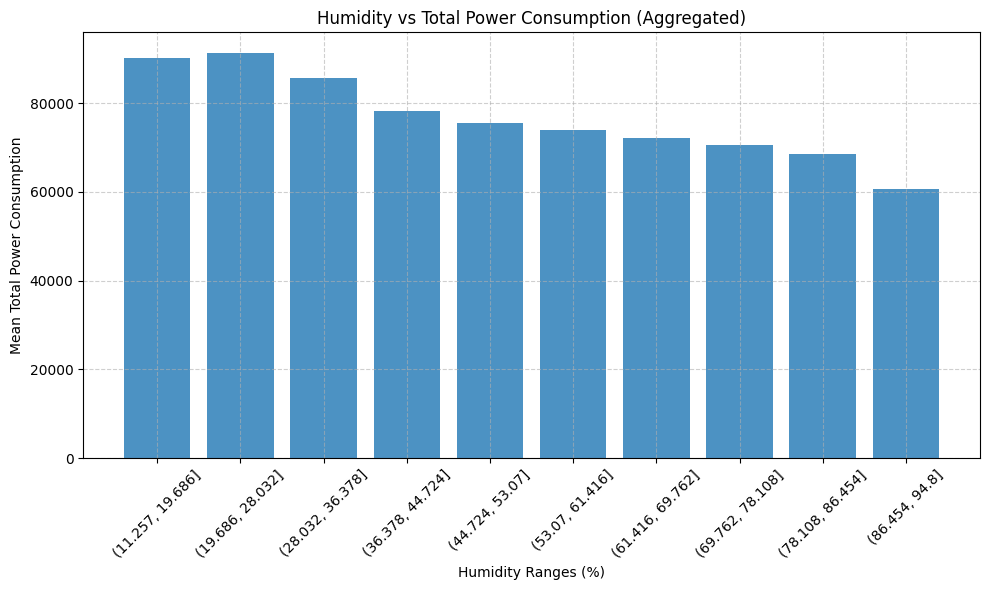

In [ ]:
# Group by humidity ranges and aggregate power consumption
humidity_bins = pd.cut(data['Humidity'], bins=10)
humidity_means = data.groupby(humidity_bins)['Total Power Consumption'].mean()
plot_aggregate_correlation(humidity_means.index.astype(str), humidity_means.values,
                           "Humidity Ranges (%)", "Mean Total Power Consumption",
                           "Humidity vs Total Power Consumption (Aggregated)", plot_type='bar')

<ipython-input-13-c8e81564edb3>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_speed_means = data.groupby(wind_speed_bins)['Total Power Consumption'].mean()


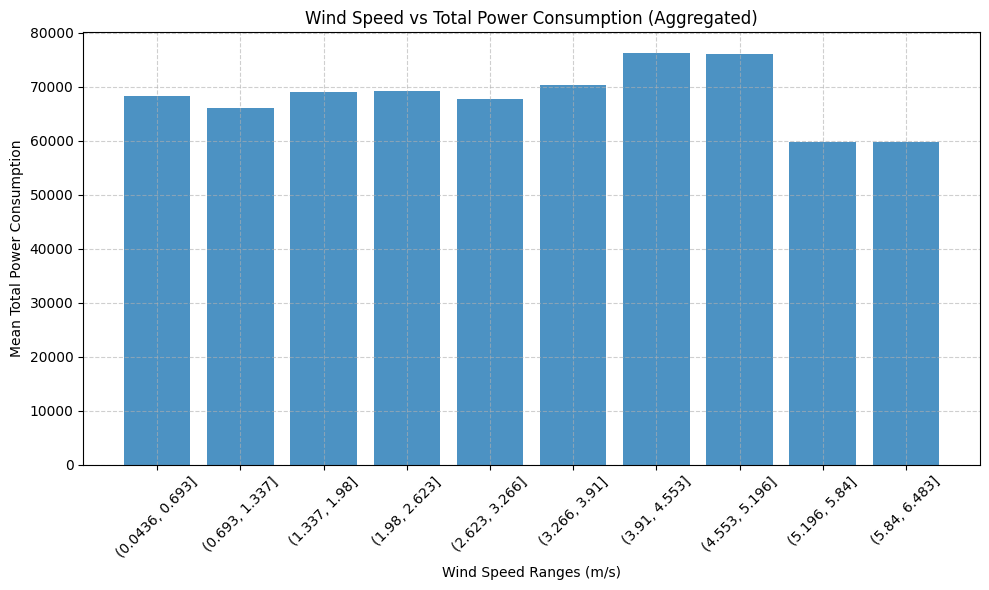

In [ ]:
# Group by wind speed ranges and aggregate power consumption
wind_speed_bins = pd.cut(data['Wind Speed'], bins=10)
wind_speed_means = data.groupby(wind_speed_bins)['Total Power Consumption'].mean()
plot_aggregate_correlation(wind_speed_means.index.astype(str), wind_speed_means.values,
                           "Wind Speed Ranges (m/s)", "Mean Total Power Consumption",
                           "Wind Speed vs Total Power Consumption (Aggregated)", plot_type='bar')

<ipython-input-14-08ba7d12826c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  general_diffuse_means = data.groupby(general_diffuse_bins)['Total Power Consumption'].mean()


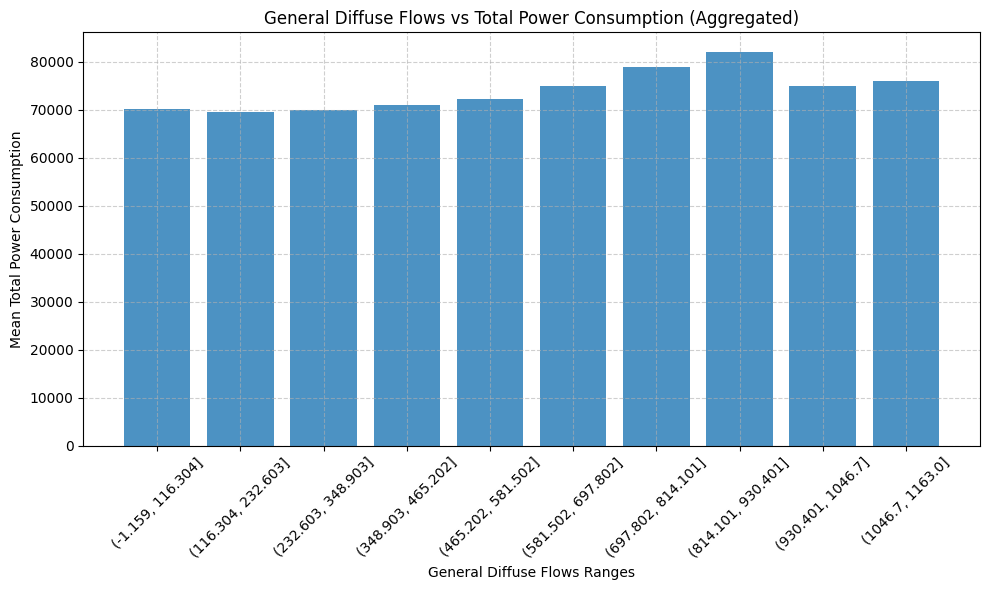

In [ ]:
# Group by general diffuse flows and aggregate power consumption
general_diffuse_bins = pd.cut(data['general diffuse flows'], bins=10)
general_diffuse_means = data.groupby(general_diffuse_bins)['Total Power Consumption'].mean()
plot_aggregate_correlation(general_diffuse_means.index.astype(str), general_diffuse_means.values,
                           "General Diffuse Flows Ranges", "Mean Total Power Consumption",
                           "General Diffuse Flows vs Total Power Consumption (Aggregated)", plot_type='bar')

<ipython-input-15-260b195898e7>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diffuse_flows_means = data.groupby(diffuse_flows_bins)['Total Power Consumption'].mean()


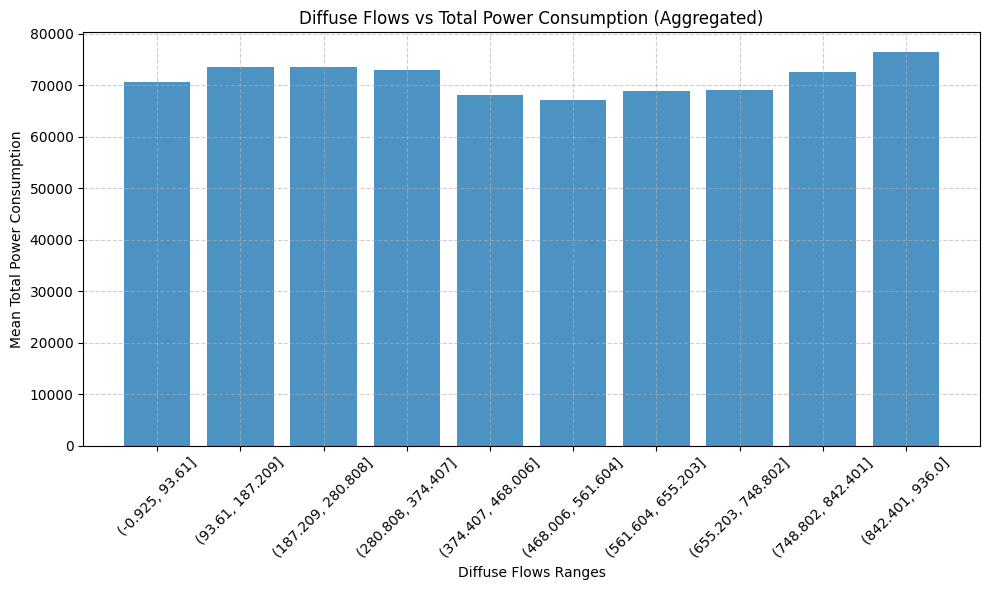

In [ ]:
# Group by diffuse flows and aggregate power consumption
diffuse_flows_bins = pd.cut(data['diffuse flows'], bins=10)
diffuse_flows_means = data.groupby(diffuse_flows_bins)['Total Power Consumption'].mean()
plot_aggregate_correlation(diffuse_flows_means.index.astype(str), diffuse_flows_means.values,
                           "Diffuse Flows Ranges", "Mean Total Power Consumption",
                           "Diffuse Flows vs Total Power Consumption (Aggregated)", plot_type='bar')

<ipython-input-16-958d060a9489>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diffuse_flows_means = data.groupby(diffuse_flows_bins)['Total Power Consumption'].mean()


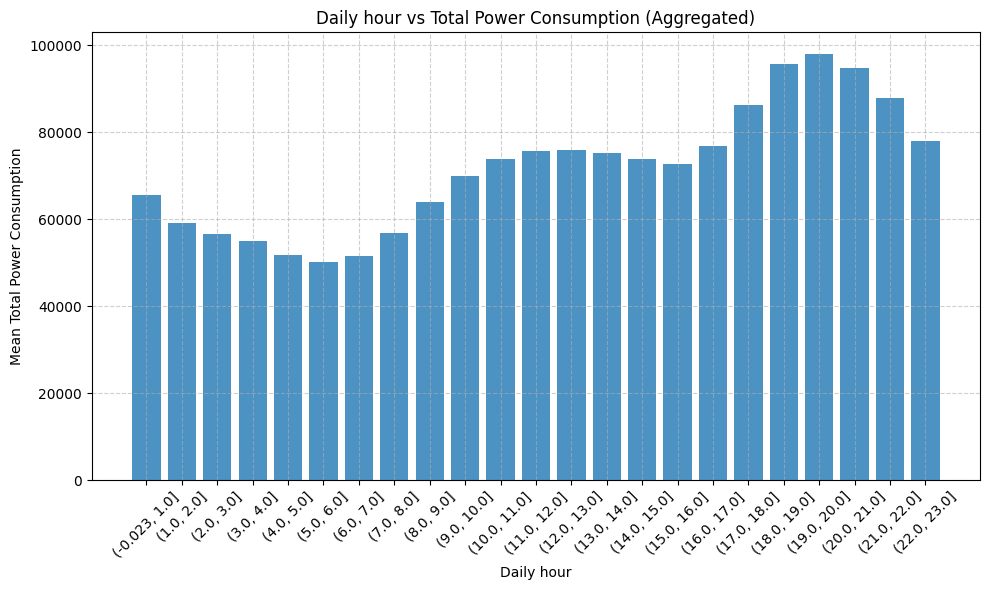

In [ ]:
# Group by diffuse flows and aggregate power consumption
diffuse_flows_bins = pd.cut(data['Hour'], bins=23)
diffuse_flows_means = data.groupby(diffuse_flows_bins)['Total Power Consumption'].mean()
plot_aggregate_correlation(diffuse_flows_means.index.astype(str), diffuse_flows_means.values,
                           "Daily hour", "Mean Total Power Consumption",
                           "Daily hour vs Total Power Consumption (Aggregated)", plot_type='bar')

<ipython-input-17-85187c85ad79>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diffuse_flows_means = data.groupby(diffuse_flows_bins)['Total Power Consumption'].mean()


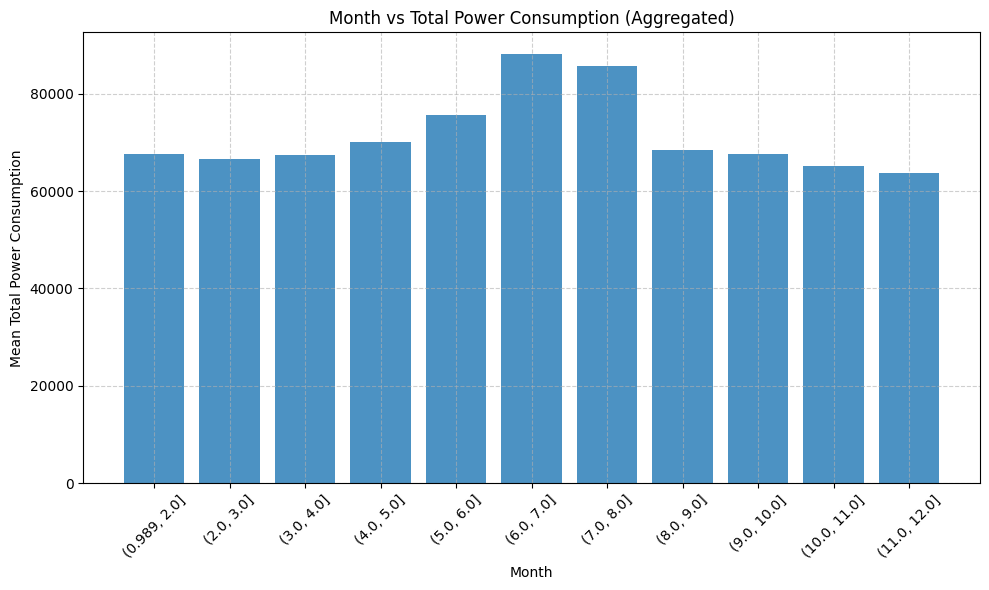

In [ ]:
# Group by diffuse flows and aggregate power consumption
diffuse_flows_bins = pd.cut(data['Month'], bins=11)
diffuse_flows_means = data.groupby(diffuse_flows_bins)['Total Power Consumption'].mean()
plot_aggregate_correlation(diffuse_flows_means.index.astype(str), diffuse_flows_means.values,
                           "Month", "Mean Total Power Consumption",
                           "Month vs Total Power Consumption (Aggregated)", plot_type='bar')

In [ ]:
# Set DateTime as index
data.set_index('DateTime', inplace=True)

# Resample to daily averages for better trend visibility
daily_data = data.resample('D').mean()

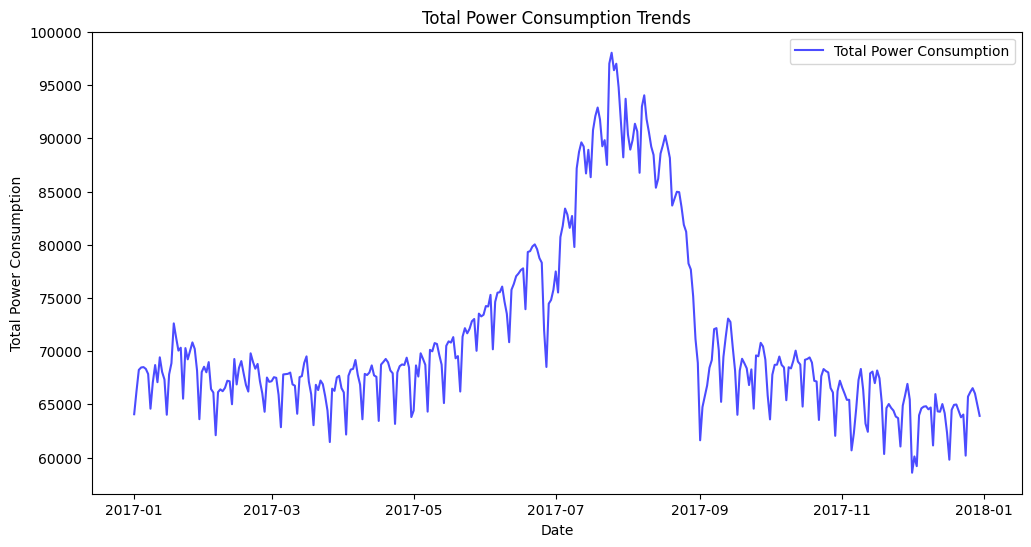

In [ ]:
# Temperature vs Power Consumption
plt.figure(figsize=(12, 6))

plt.plot(daily_data['Total Power Consumption'], label='Total Power Consumption', color='blue', alpha=0.7)
plt.title('Total Power Consumption Trends')
plt.xlabel('Date')
plt.ylabel('Total Power Consumption')
plt.legend()
plt.show()

<ipython-input-20-6d7397dedf26>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


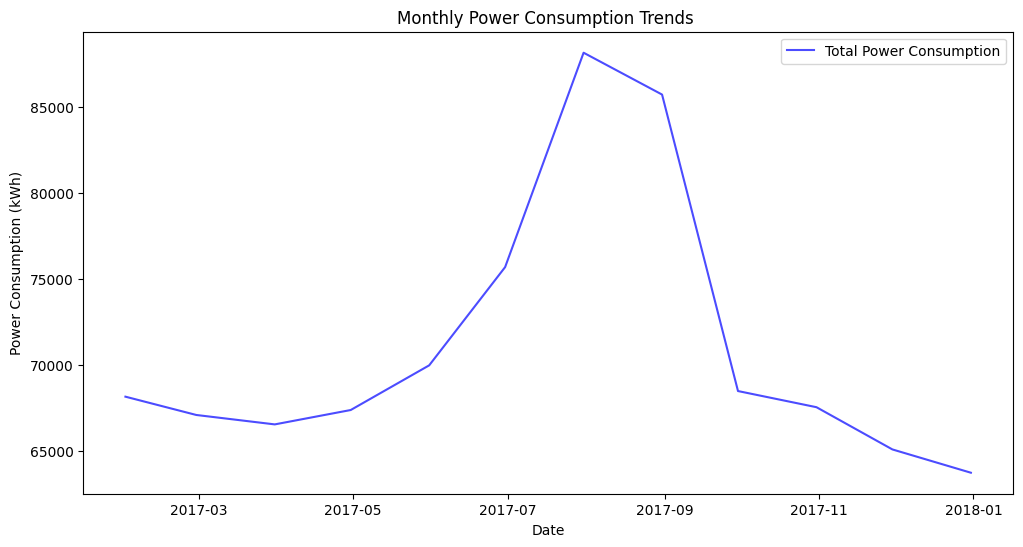

In [ ]:
# Monthly Power Consumption Trends
monthly_data = data.resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Total Power Consumption'], label='Total Power Consumption', color='blue', alpha=0.7)
plt.title('Monthly Power Consumption Trends ')
plt.xlabel('Date')
plt.ylabel('Power Consumption (kWh)')
plt.legend()
plt.show()

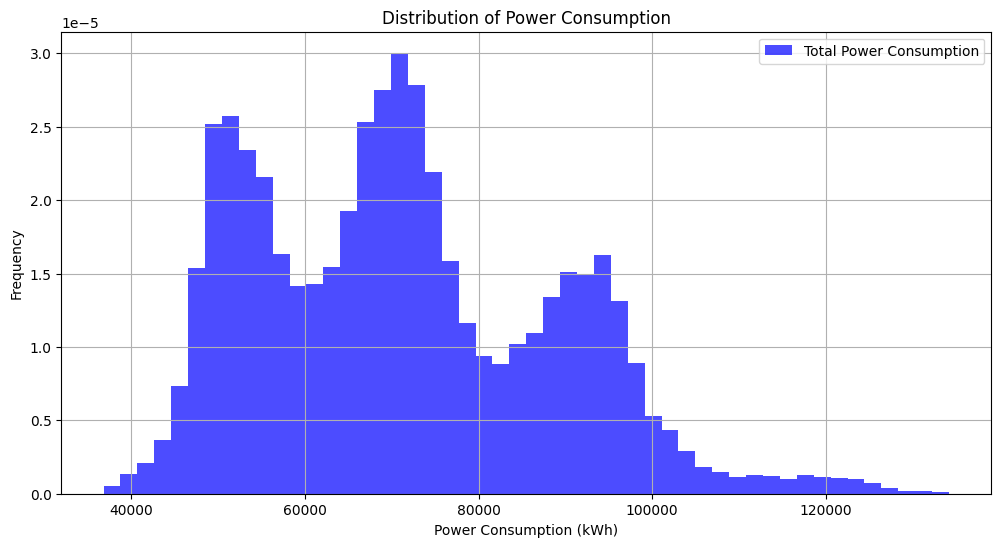

In [ ]:
# Distribution of Power Consumption
plt.figure(figsize=(12, 6))
plt.hist(data['Total Power Consumption'], bins=50, alpha=0.7, label='Total Power Consumption', color='blue', density=True)
plt.title('Distribution of Power Consumption')
plt.xlabel('Power Consumption (kWh)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

In [ ]:
df['Total Power Consumption'].describe()

,Total Power Consumption
count,52416.000000
mean,71222.885864
std,17143.138964
min,36785.039739
25%,56499.074640
50%,69788.790940
75%,83749.172310
max,134208.145950


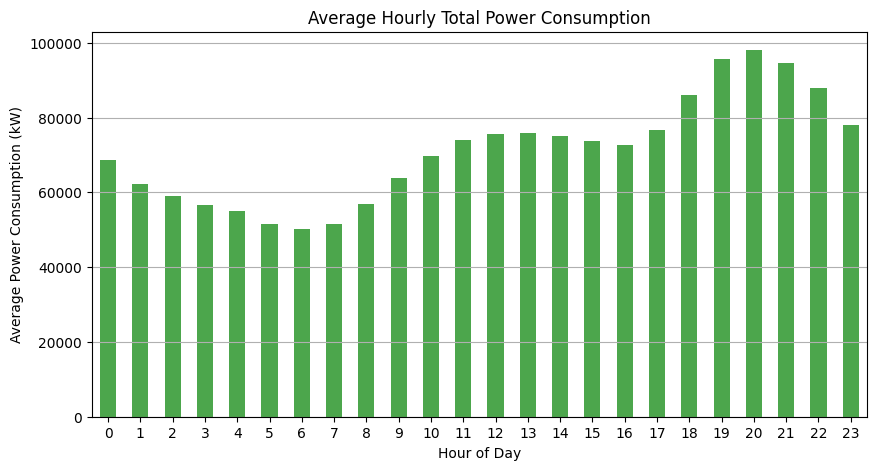

In [ ]:
# Step 5: Analyze Hourly Average Power Consumption
hourly_consumption = df.groupby('Hour')['Total Power Consumption'].mean()

plt.figure(figsize=(10, 5))
hourly_consumption.plot(kind='bar', color='green', alpha=0.7)
plt.title('Average Hourly Total Power Consumption')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power Consumption (kW)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
# Define features (X) and target (y)
features = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
            'diffuse flows', 'Hour', 'Day', 'Month', 'Weekday']
X = df[features]
y = df['Total Power Consumption']

In [ ]:
# Normalize/Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Train a Random Forest Regressor on the entire dataset
model = RandomForestRegressor(n_estimators=150)
model.fit(X_scaled, y)


RandomForestRegressor(n_estimators=150)

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

# Combine features and their importance into a DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

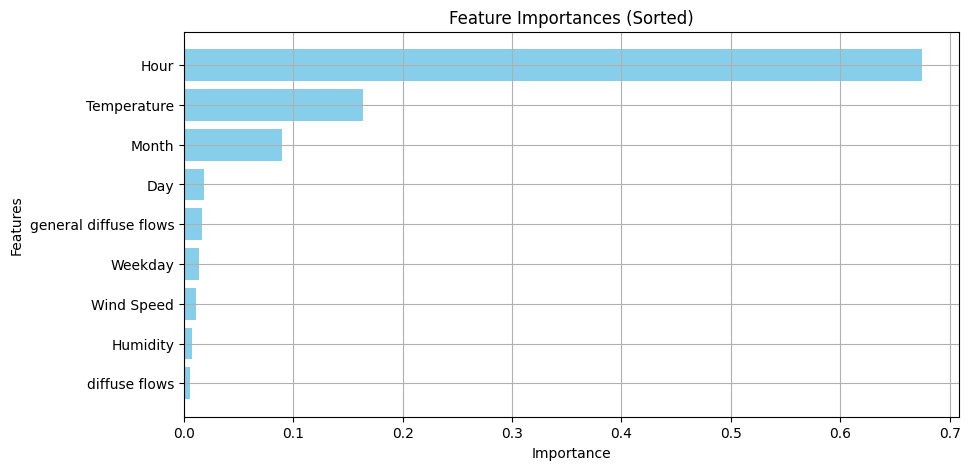

In [ ]:
# Plot sorted feature importances
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importances (Sorted)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.grid()
plt.show()

In [ ]:
importance_df.shape[0]

9

In [ ]:
# Define important features and target
important_features = ['Hour', 'Temperature', 'Month']
X = df[important_features]
y = df['Total Power Consumption']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# ======================
# Linear Regression
# ======================
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = linear_model.predict(X_test_scaled)

# Linear Regression Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
explained_var_lr = explained_variance_score(y_test, y_pred_lr)

print("\nLinear Regression Additional Metrics:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")
print(f"Explained Variance Score: {explained_var_lr:.2f}")


Linear Regression Additional Metrics:
Mean Absolute Error (MAE): 8526.72
Root Mean Squared Error (RMSE): 10877.59
R-squared (R2): 0.61
Explained Variance Score: 0.61


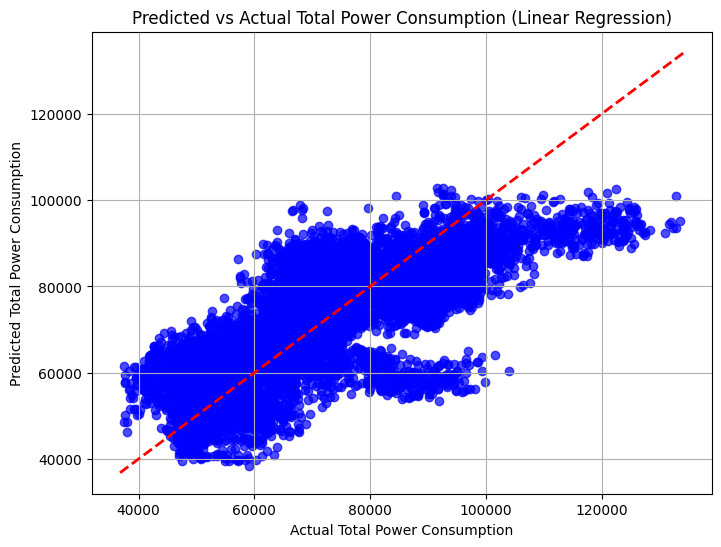

In [ ]:
# Plot predicted vs actual values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs Actual Total Power Consumption (Linear Regression)')
plt.xlabel('Actual Total Power Consumption')
plt.ylabel('Predicted Total Power Consumption')
plt.grid()
plt.show()

In [ ]:
# ======================
# Gradient Boosting Regressor
# ======================
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gbr = gbr_model.predict(X_test_scaled)

# Gradient Boosting Metrics
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)
explained_var_gbr = explained_variance_score(y_test, y_pred_gbr)

print("\nGradient Boosting Regressor Additional Metrics:")
print(f"Mean Absolute Error (MAE): {mae_gbr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")
print(f"R-squared (R2): {r2_gbr:.2f}")
print(f"Explained Variance Score: {explained_var_gbr:.2f}")


Gradient Boosting Regressor Additional Metrics:
Mean Absolute Error (MAE): 3830.76
Root Mean Squared Error (RMSE): 5192.12
R-squared (R2): 0.91
Explained Variance Score: 0.91


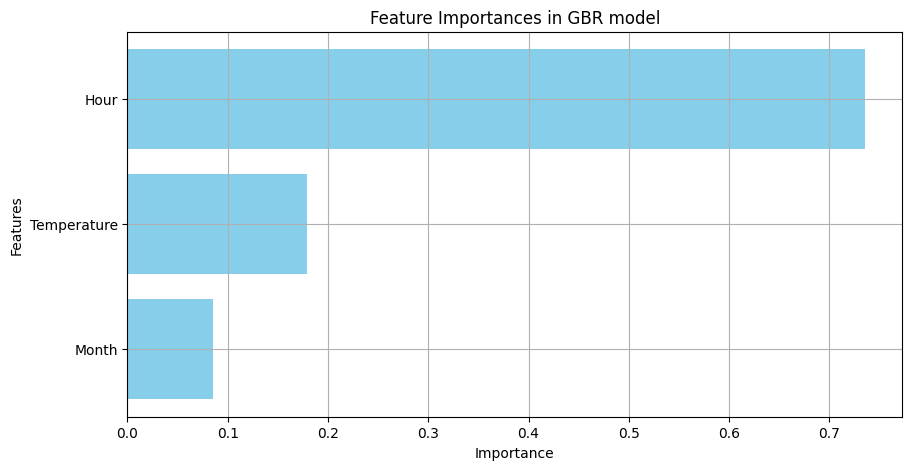

In [ ]:
# Display Gradient Boosting feature importances
gbr_feature_importances = pd.DataFrame({
    'Feature': important_features,
    'Importance': gbr_model.feature_importances_
}).sort_values(by='Importance', ascending=False)



plt.figure(figsize=(10, 5))
plt.barh(gbr_feature_importances['Feature'], gbr_feature_importances['Importance'], color='skyblue')
plt.title('Feature Importances in GBR model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.grid()
plt.show()

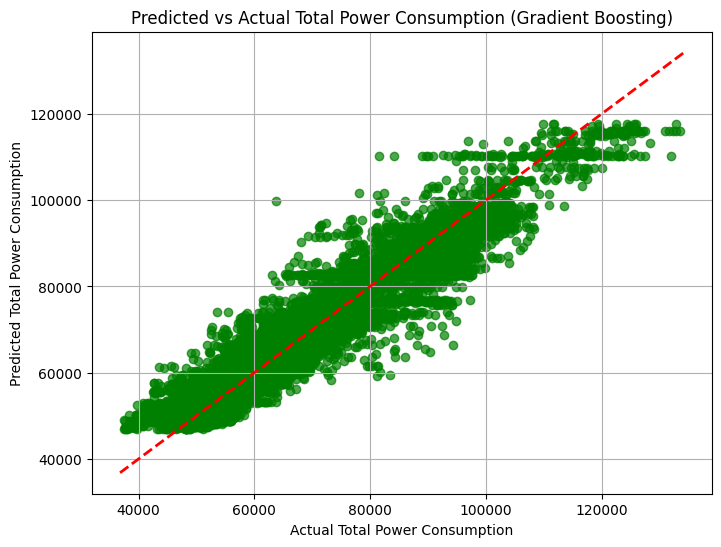

In [ ]:
# Plot predicted vs actual values for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs Actual Total Power Consumption (Gradient Boosting)')
plt.xlabel('Actual Total Power Consumption')
plt.ylabel('Predicted Total Power Consumption')
plt.grid()
plt.show()

In [ ]:
# Train a K-Nearest Neighbors Regressor (KNN)
knn_model = KNeighborsRegressor(n_neighbors=6)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the KNN model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)
explained_var_knn = explained_variance_score(y_test, y_pred_knn)

print("\nK-Nearest Neighbors Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")
print(f"R-squared (R2): {r2_knn:.2f}")
print(f"Explained Variance Score: {explained_var_knn:.2f}")


K-Nearest Neighbors Regressor Model Evaluation:
Mean Absolute Error (MAE): 2821.30
Root Mean Squared Error (RMSE): 4116.75
R-squared (R2): 0.94
Explained Variance Score: 0.94


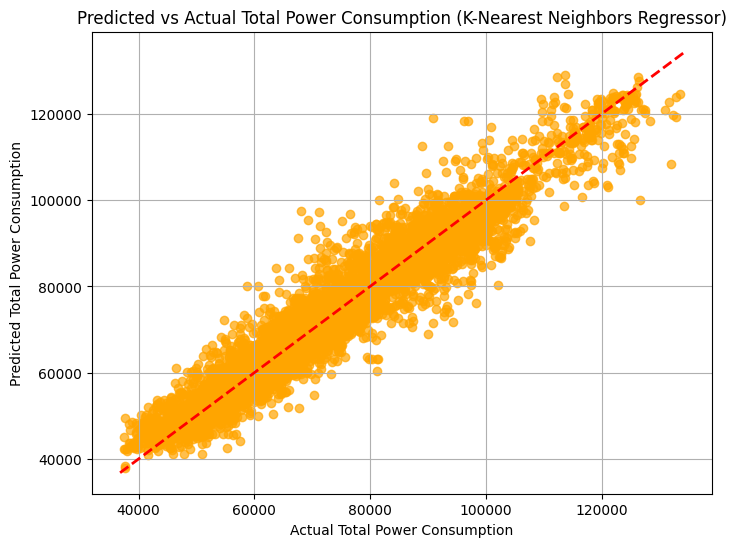

In [ ]:
# Plot predicted vs actual values for KNN
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.7, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs Actual Total Power Consumption (K-Nearest Neighbors Regressor)')
plt.xlabel('Actual Total Power Consumption')
plt.ylabel('Predicted Total Power Consumption')
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor

# Initialize K-Nearest Neighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=6)

# Define K-fold cross-validation with shuffling (shuffle=True ensures randomization)
kf = KFold(n_splits=5, shuffle=True)

# Perform K-fold cross-validation with R² as the scoring metric
cv_scores = cross_val_score(knn_model, X_scaled, y, cv=kf, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the cross-validation results
print("\nK-Nearest Neighbors Regressor (KNN) Cross-Validation Results (R²) with Shuffling:")
print(f"Mean CV R²: {mean_cv_score:.2f}")
print(f"Standard Deviation of CV R²: {std_cv_score:.5f}")


K-Nearest Neighbors Regressor (KNN) Cross-Validation Results (R²) with Shuffling:
Mean CV R²: 0.98
Standard Deviation of CV R²: 0.00060


In [ ]:
# Using all features
important_features = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
            'diffuse flows', 'Hour', 'Day', 'Month', 'Weekday']
X = df[important_features]
y = df['Total Power Consumption']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a K-Nearest Neighbors Regressor (KNN)
knn_model = KNeighborsRegressor(n_neighbors=6)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the KNN model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)
explained_var_knn = explained_variance_score(y_test, y_pred_knn)

print("\nK-Nearest Neighbors Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")
print(f"R-squared (R2): {r2_knn:.2f}")


K-Nearest Neighbors Regressor Model Evaluation:
Mean Absolute Error (MAE): 1657.67
Root Mean Squared Error (RMSE): 2625.59
R-squared (R2): 0.98
